# Group Proposal

## Diagnosing Coronary Artery Disease using Classification

### Introduction

The most prevalent type of heart disease in the world is known as Coronary Artery Disease (CAD). This medical condition arises when the arteries responsible for carrying blood to the heart become narrowed or stiffened due to the accumulation of plaque. Plaque, composed of fats, cholesterol, and other blood-borne substances, leads to the condition known as atherosclerosis. The most common symptom of CAD is angina, often described as chest pain and discomfort, emerging as the most prevalent symptom of coronary artery disease (CAD). This discomfort is a result of arteries becoming constricted due to the accumulation of excessive plaque, thus impeding the flow of blood. This narrowing of arteries not only affects blood circulation to the heart muscle but also to other parts of the body. However, individuals often overlook these symptoms until they experience their first heart attack, which serves as the initial indication of coronary artery disease (CAD).With time, CAD has the potential to weaken the heart muscle, potentially resulting in heart failure—a severe condition in which the heart's ability to pump blood efficiently is compromised.  Common process to diagnose CAD are electrocardiograms, echocardiograms, exercise stress tests, chest X-rays, cardiac catheterizations, coronary angiograms, and coronary artery calcium scans, however, they may carry risks such as exposure to radiation, potential allergic reactions to contrast agents, and invasive procedures that could lead to complications.

### Methods
Our analysis will mainly focus on classification to build the model of heart disease based on the variables such as age, blood pressure and cholesterol levels etc. In the process of analysis, we will select relevant data and use classification to predict whether patients have certain diseases based on the variables from above. After we tidy the data and choose the appropriate classification model, we will train the model on the patients whose disease status is clear. We will test if the performance of the model works well, if it does, we can use this classification to predict the disease of new patients. 
Visualization will consist of scatter plots to evaluate the performance of the model and address the effect.   

### Expected Outcomes and Significance
For this analysis, we expect to identify certain predictors of heart disease, which can range from age and gender to measurements like blood pressures and cholesterol levels. 

The impact of this would be a more efficient and streamlined way of discovering possible patients with heart diseases just by running the variables (age, blood pressure, cholesterol levels, etc) to see if someone would need further analysis just by scanning through a dataset of patients. This assists with public health strategy planning and risk assessments. 

By scanning patient data and finding out who needs further analysis due to potentially elevated risk of heart disease, we can ask what other variables are observed in those patients that are also correlated with an increased risk for heart disease.


In [14]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
process_data_cleveland<-read_delim("processed.cleveland.data", delim=",", col_names = FALSE)|>
rename(

    age = X1,
    sex = X2,
    cp=X3,
    trestbps = X4,
    chol = X5,
    fbs= X6, 
    restecg  =X7,
    thalach =X8,
    exang=X9,
    oldpeak=X10,
    slope=X11,
    ca =X12,
    thal=X13,
    num =X14)

process_data_cleveland

# cleaning, wrangling data
process_data_cleveland[process_data_cleveland == "?" ] <- NA

cleveland_clean <- process_data_cleveland |>
                    mutate(diag = ifelse(is.na(num), NA, (num > 0))) |>
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                           fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                           exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                           ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope)))

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Speci

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


In [12]:
process_data_cleveland |>
  group_by(num) |>
  summarize(n = n())

num,n
<dbl>,<int>
0,164
1,55
2,36
3,35
4,13


In [31]:
cleveland_split <- initial_split(cleveland_clean, prop = 3/4, strata = num)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

cleveland_training <- cleveland_training |>
                    select(c('num','chol' , 'age', 'sex', 'thalach', 'fbs', 'exang', 'trestbps','diag'))
head(cleveland_training)
     

num,chol,age,sex,thalach,fbs,exang,trestbps,diag
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<lgl>
0,233,63,1,150,1,0,145,FALSE
0,250,37,1,187,0,0,130,FALSE
0,204,41,0,172,0,0,130,FALSE
0,236,56,1,178,0,0,120,FALSE
0,354,57,0,163,0,1,120,FALSE
0,294,56,0,153,0,0,140,FALSE


In [32]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
cleveland_summary <- cleveland_training |>
                    group_by(diag) |>
                    summarize(
                              min_chol = min(chol), max_chol = max(chol), mean_chol = mean(chol), 
                              min_thalach = min(thalach), max_thalach = max(thalach), mean_thalach = mean(thalach),
                              n_of_patients = n())

cleveland_summary

diag,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach,n_of_patients
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FALSE,126,564,243.3740,111,194,159.2846,123
TRUE,167,409,253.5288,71,195,139.8942,104


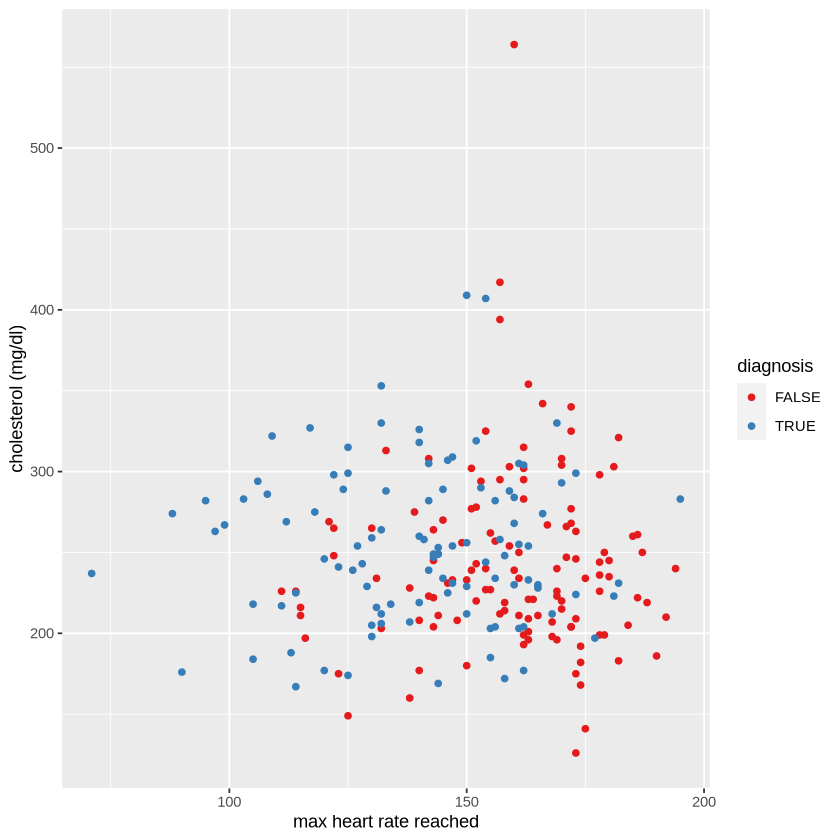

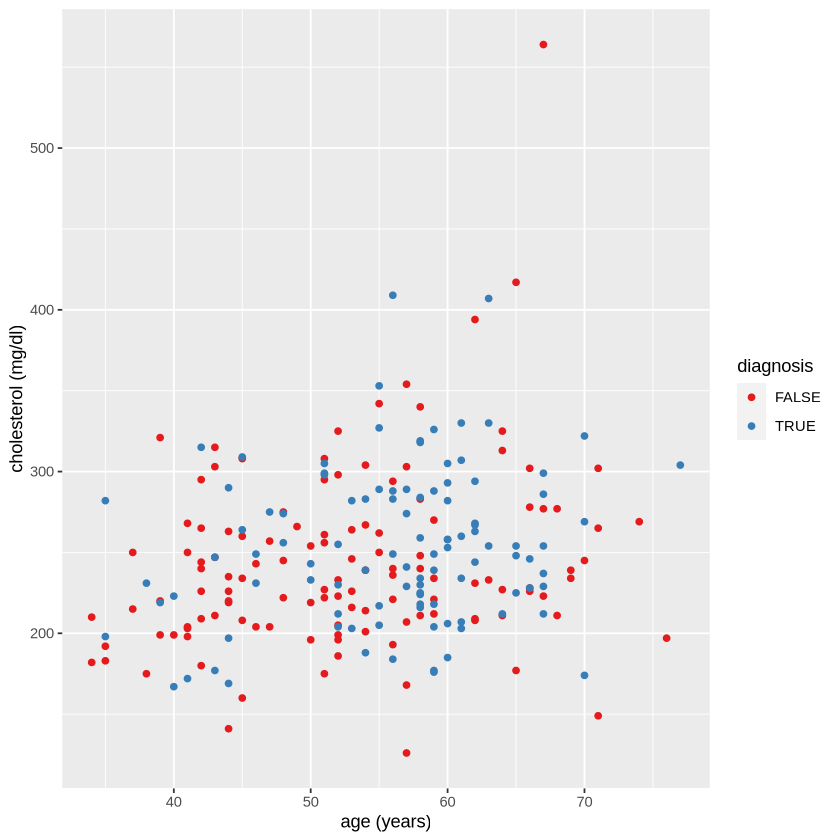

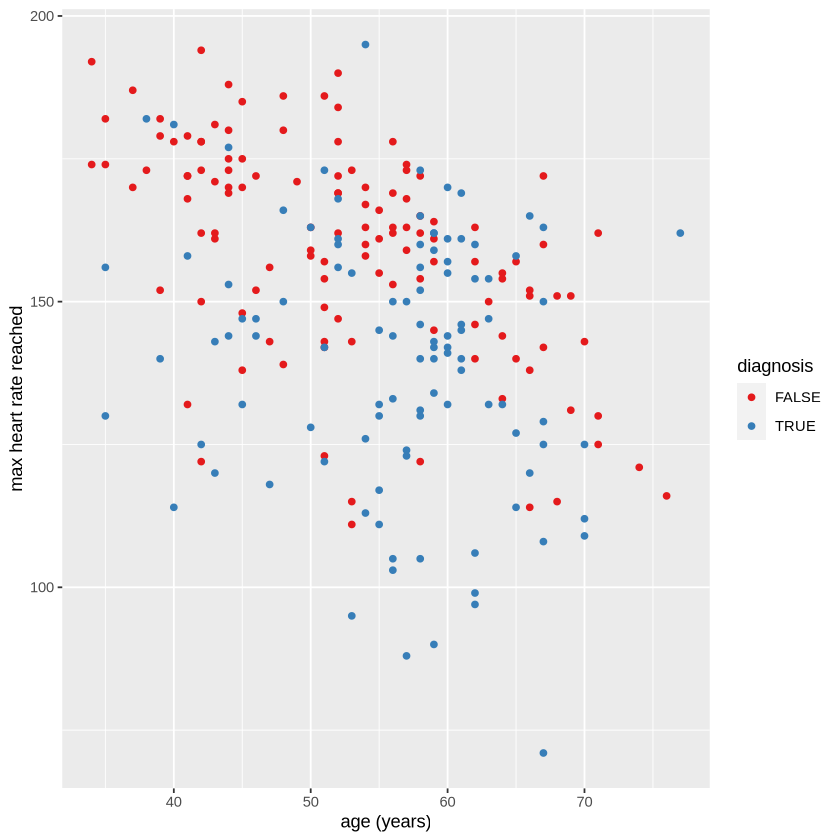

In [33]:
plot1 <- ggplot(cleveland_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot2 <- ggplot(cleveland_training, aes(x = age, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "cholesterol (mg/dl)", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot3 <- ggplot(cleveland_training, aes(x = age, y = thalach, color = diag)) +
                 geom_point() +
                 labs(x = "age (years)", y = "max heart rate reached", color = "diagnosis") +
                 scale_color_brewer(palette = "Set1")

plot1
plot2
plot3